Exploratory Data Analysis on Stock prices for the leading GPU producing companies, available at:
https://www.kaggle.com/datasets/kapturovalexander/nvidia-amd-intel-asus-msi-share-prices

I have connected two additional data sets:
Cryptocurrency prices:
https://www.kaggle.com/datasets/svaningelgem/crypto-currencies-daily-prices

CBOE Volatility Index (VIX), sourced from:
https://www.cboe.com/tradable_products/vix/vix_historical_data/




In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from platform import python_version
python_version()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crypto-currencies-daily-prices/JOE.csv
/kaggle/input/crypto-currencies-daily-prices/XTZ.csv
/kaggle/input/crypto-currencies-daily-prices/GAL.csv
/kaggle/input/crypto-currencies-daily-prices/MKR.csv
/kaggle/input/crypto-currencies-daily-prices/COMP.csv
/kaggle/input/crypto-currencies-daily-prices/LSK.csv
/kaggle/input/crypto-currencies-daily-prices/SHIB.csv
/kaggle/input/crypto-currencies-daily-prices/RUNE.csv
/kaggle/input/crypto-currencies-daily-prices/LEO.csv
/kaggle/input/crypto-currencies-daily-prices/USDT.csv
/kaggle/input/crypto-currencies-daily-prices/ETH.csv
/kaggle/input/crypto-currencies-daily-prices/ILV.csv
/kaggle/input/crypto-currencies-daily-prices/PLA.csv
/kaggle/input/crypto-currencies-daily-prices/XCH.csv
/kaggle/input/crypto-currencies-daily-prices/QTUM.csv
/kaggle/input/crypto-currencies-daily-prices/AMP.csv
/kaggle/input/crypto-currencies-daily-prices/APE.csv
/kaggle/input/crypto-currencies-daily-prices/ICX.csv
/kaggle/input/crypto-currencies-daily-pri

In [2]:
data_MSI = pd.read_csv('../input/nvidia-amd-intel-asus-msi-share-prices/MSI (1962-2023).csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
data_Intel = pd.read_csv('../input/nvidia-amd-intel-asus-msi-share-prices/Intel (1980-2023).csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
data_ASUS = pd.read_csv('../input/nvidia-amd-intel-asus-msi-share-prices/ASUS (2000-2023).csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
data_NVIDIA = pd.read_csv('../input/nvidia-amd-intel-asus-msi-share-prices/NVIDIA (1999-2023).csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
data_AMD = pd.read_csv('../input/nvidia-amd-intel-asus-msi-share-prices/AMD (1980-2023).csv',index_col='Date',parse_dates=True,infer_datetime_format=True)


In [3]:
data_VIX = pd.read_csv('../input/cboe-volatility-index/VIX_History.csv',index_col='DATE',parse_dates=True,infer_datetime_format=True)

In [4]:
crypto_BTC = pd.read_csv('../input/crypto-currencies-daily-prices/BTC.csv',index_col='date',parse_dates=True,infer_datetime_format=True)
crypto_ETH = pd.read_csv('../input/crypto-currencies-daily-prices/ETH.csv',index_col='date',parse_dates=True,infer_datetime_format=True)

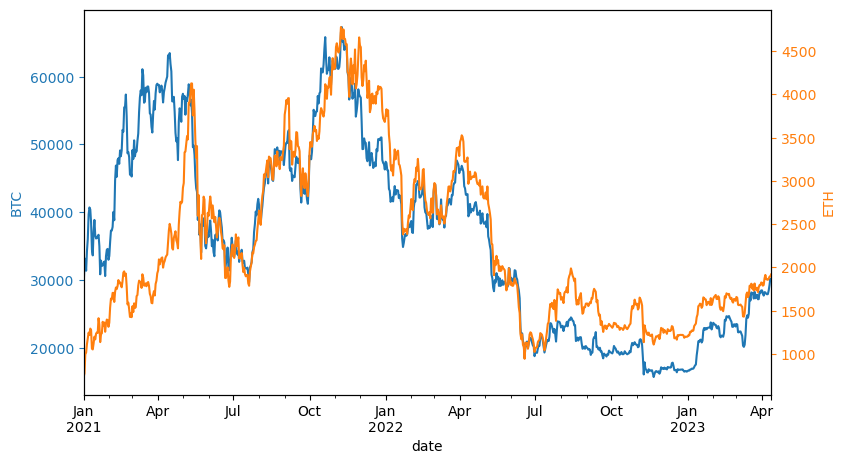

In [5]:
# Plot of BTC and ETH
fig, ax = plt.subplots(figsize=(11,5))
axes = [ax,ax.twinx()]
fig.subplots_adjust(right=0.75)

START_DATE='2021-01-01'
END_DATE='2023-04-12'

color1=('tab:blue')
color2=('tab:orange')
crypto_BTC.loc[START_DATE:END_DATE,'close'].plot(ax=ax,color=color1)
crypto_ETH.loc[START_DATE:END_DATE,'close'].plot(ax=axes[1],color=color2)
axes[0].set_ylabel("BTC",color=color1)
axes[0].tick_params(axis='y',colors=color1)
axes[1].set_ylabel("ETH",color=color2)
axes[1].tick_params(axis='y',colors=color2)

In [6]:
data_sets=[data_MSI,data_Intel,data_ASUS,data_NVIDIA,data_AMD]
names=['MSI','Intel','ASUS','NVIDIA','AMD']

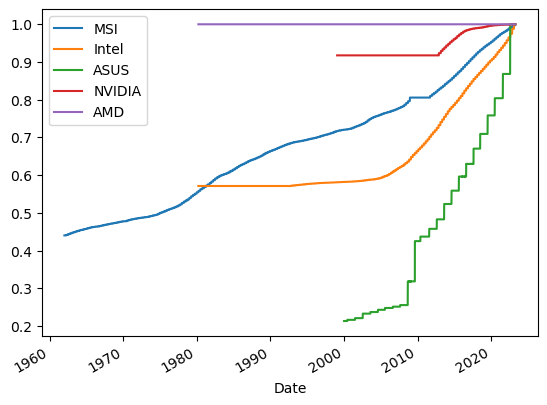

In [7]:
# Extracting Adjustment Factor
for data_set in data_sets:
    data_set['AdjFactor'] = data_set['Adj Close'] / data_set['Close']
ax=0
for data_set,name in zip(data_sets,names):
    if ax == 0:
        ax=data_set['AdjFactor'].plot(label=name)
    else:
        data_set['AdjFactor'].plot(ax=ax,label=name)
plt.legend()

In [8]:
# Define linear returns Vf/Vi - 1 
# Using Adjusted Close as the values
# daily returns: require lagged shift
for data_set in data_sets:
    data_set['AdjClose_lag_1']=data_set['Adj Close'].shift(1)
    data_set['DailyLinearReturn']=data_set['Adj Close'] / data_set['AdjClose_lag_1'] - 1
    data_set['DailyLogReturn']=np.log(data_set['Adj Close'] / data_set['AdjClose_lag_1'])

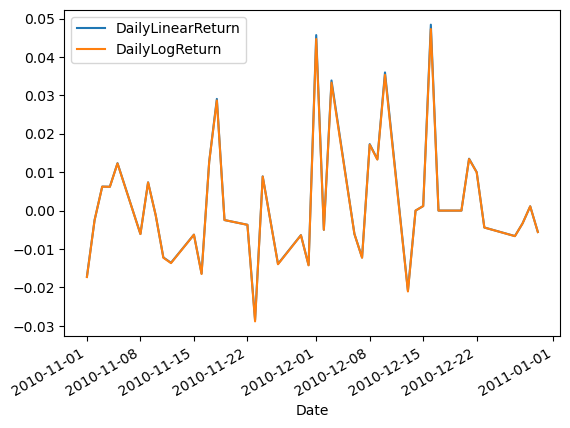

In [9]:
START_DATE='2010-11-01'
END_DATE='2010-12-30'

ax = data_MSI.loc[START_DATE:END_DATE,'DailyLinearReturn'].plot()
data_MSI.loc[START_DATE:END_DATE,'DailyLogReturn'].plot(ax=ax)
plt.legend()

Can see that both definitions of the return are extremely similar for these values.

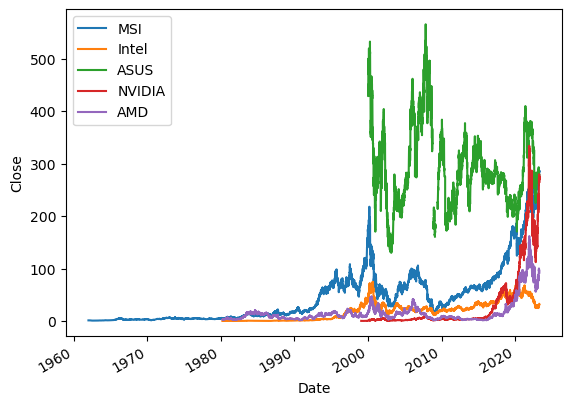

In [10]:
ax = 0
#for i in range(len(data_sets)):
for data_set,data_name in zip(data_sets,names):
    #data_set=data_sets[i]
    #data_name = names[i]
    if ax == 0:
        ax = data_set['Close'].plot(label=data_name)
    else:
        data_set['Close'].plot(ax=ax,label=data_name)
ax.set_ylabel("Close")
plt.legend()

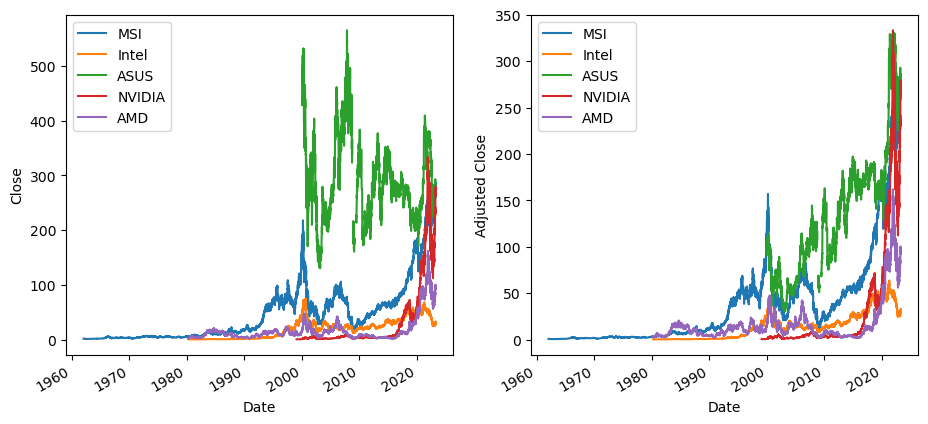

In [11]:
#ax = 0

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(11,5))
#axes = [ax,ax.twinx()]
#fig.subplots_adjust(right=0.75)

#for i in range(len(data_sets)):
for data_set,data_name in zip(data_sets,names):
    #data_set=data_sets[i]
    #data_name = names[i]
    #if ax == 0:
    #    ax = data_set['Adj Close'].plot(label=data_name)
    #else:
    data_set['Close'].plot(ax=ax1,label=data_name)
    data_set['Adj Close'].plot(ax=ax2,label=data_name)
ax1.set_ylabel("Close")
ax2.set_ylabel("Adjusted Close")
ax1.legend()
ax2.legend()
#plt.legend(ax=ax1)

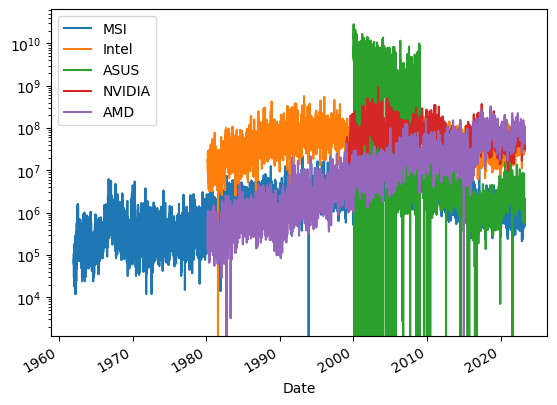

In [12]:
ax = 0
#for i in range(len(data_sets)):
for data_set,data_name in zip(data_sets,names):
#    data_set=data_sets[i]
#    data_name = names[i]
    if ax == 0:
        ax = data_set['Volume'].plot(label=data_name)
    else:
        data_set['Volume'].plot(ax=ax,label=data_name)
ax.set_yscale('log')
plt.legend()

In [13]:
# Smoothed trading volume
for data_set in data_sets:
    data_set['30DaySmoothedVolume'] = data_set['Volume'].rolling(window=30,center=False,min_periods=20).mean()

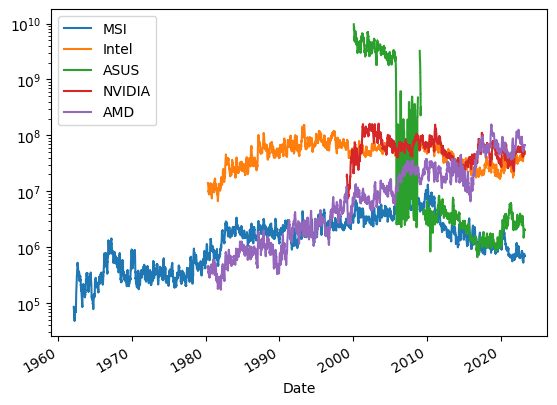

In [14]:
ax = 0
#for i in range(len(data_sets)):
for data_set,data_name in zip(data_sets,names):
#    data_set=data_sets[i]
#    data_name = names[i]
    if ax == 0:
        ax = data_set['30DaySmoothedVolume'].plot(label=data_name)
    else:
        data_set['30DaySmoothedVolume'].plot(ax=ax,label=data_name)
ax.set_yscale('log')
plt.legend()

In [15]:
# Define volatility measurements

def CalcPeriodVol(X,time_range):
    value=X['DailyLogReturn']
    #time_range=30
    min_periods=int(time_range / 2)
    vol_name=f"{time_range}DayVol"
    # see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
    # for more possibilities, including date ranges
    X[vol_name]=value.rolling(window=time_range,center=False,min_periods=min_periods).std() / np.sqrt(time_range)


In [16]:
my_time_range=30
for data_set in data_sets:
    CalcPeriodVol(data_set,my_time_range)

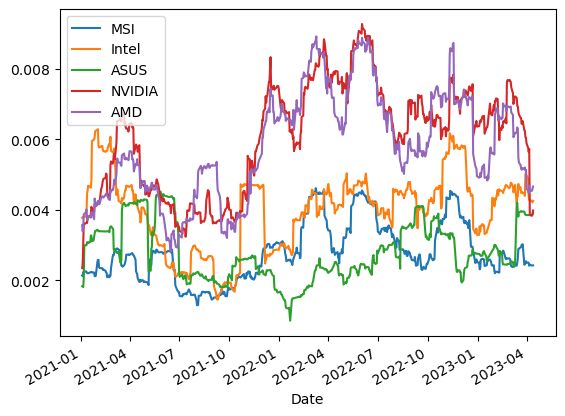

In [17]:
START_DATE='2021-01-01'
END_DATE='2023-04-12'
ax=0

for data_set,data_name in zip(data_sets,names):
    if ax == 0:
        ax = data_set.loc[START_DATE:END_DATE,'30DayVol'].plot(label=data_name)
    else:
        data_set.loc[START_DATE:END_DATE,'30DayVol'].plot(ax=ax,label=data_name)
plt.legend()


One can observe strong correlations in absolute volatility between NVIDIA and AMD. Can also see similar patterns in changes in volatity, such as the similarity between the behavior of volatility in AMD and MSI. 

Next, we can compare these to a volatility index to see if these similarities may be partially explained by broader volatility in the markets.

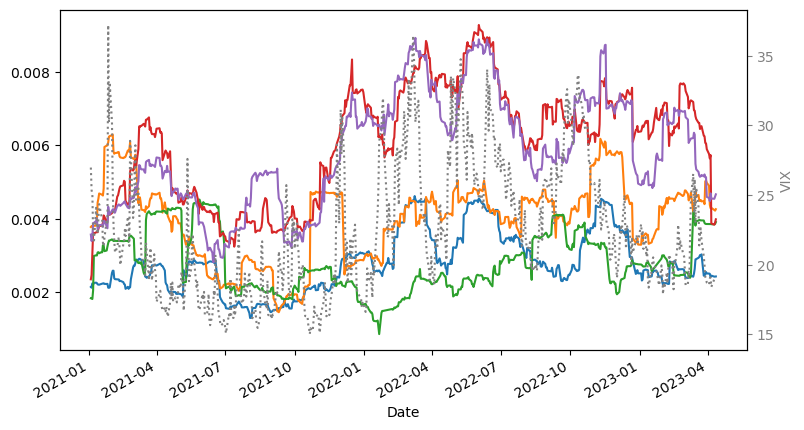

In [18]:
START_DATE='2021-01-01'
END_DATE='2023-04-12'
#ax=0

fig, ax = plt.subplots(figsize=(11,5))
axes = [ax,ax.twinx()]
fig.subplots_adjust(right=0.75)

for data_set,data_name in zip(data_sets,names):
    data_set.loc[START_DATE:END_DATE,'30DayVol'].plot(ax=ax,label=data_name)
#plt.legend()

color2=('gray')
#vols.loc[START_DATE:END_DATE].plot(ax=ax)
data_VIX.loc[START_DATE:END_DATE,'CLOSE'].plot(ax=axes[1],color=color2,linestyle='dotted')
axes[1].set_ylabel("VIX",color=color2)
axes[1].tick_params(axis='y',colors=color2)


# Quick Look at the Cryptos

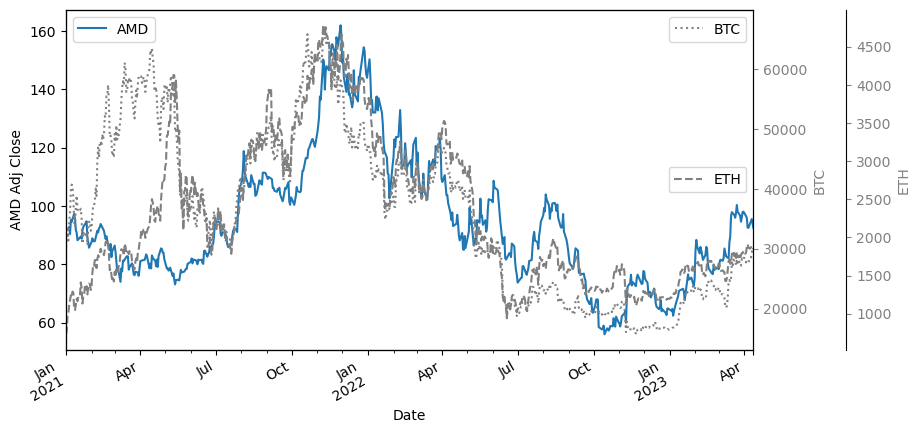

In [19]:
fig, ax = plt.subplots(figsize=(11,5))
axes = [ax,ax.twinx(),ax.twinx()]
fig.subplots_adjust(right=0.75)
axes[2].spines.right.set_position(("axes", 1.135))
#fig, ax = plt.subplots(figsize=(11,5))
#axes = [ax,ax.twinx()]
#fig.subplots_adjust(right=0.75)

START_DATE='2021-01-01'
END_DATE='2023-04-12'

color2=('gray')
color3=('gray')
data_AMD.loc[START_DATE:END_DATE,'Adj Close'].plot(ax=ax,label="AMD")
crypto_BTC.loc[START_DATE:END_DATE,'close'].plot(ax=axes[1],color=color2,linestyle='dotted',label="BTC")
crypto_ETH.loc[START_DATE:END_DATE,'close'].plot(ax=axes[2],color=color3,linestyle='dashed',label="ETH")
#crypto_ETH.loc[START_DATE:END_DATE,'close'].plot(ax=axes[1],color=color2,linestyle='dashed',label="ETH")

axes[0].set_ylabel("AMD Adj Close")
axes[1].set_ylabel("BTC",color=color2)
axes[1].tick_params(axis='y',colors=color2)
axes[2].set_ylabel("ETH",color=color3)
axes[2].tick_params(axis='y',colors=color3)

axes[0].legend(loc='upper left')
axes[1].legend(loc='upper right')
axes[2].legend(loc='right')

I find it interesting and exciting to note that the Ethereum blockchain switched from Proof-of-Work to Proof-of-Stake in September of 2022, which replaced the power and GPU intensive process of mining.

In [20]:
crypto_frame = pd.concat([crypto_BTC['close'],crypto_ETH['close']],axis=1)
crypto_frame.set_axis(['BTC','ETH'],axis=1,inplace=True)
crypto_frame.dropna(inplace=True)
crypto_frame.head()

,BTC,ETH
date,,
2015-08-07,277.89,3.00
2015-08-08,258.60,1.20
2015-08-09,263.87,1.20
2015-08-10,263.30,1.20
2015-08-11,269.03,0.99


In [21]:
crypto_frame['ETH_BTC_Ratio']=crypto_frame['ETH']/crypto_frame['BTC']

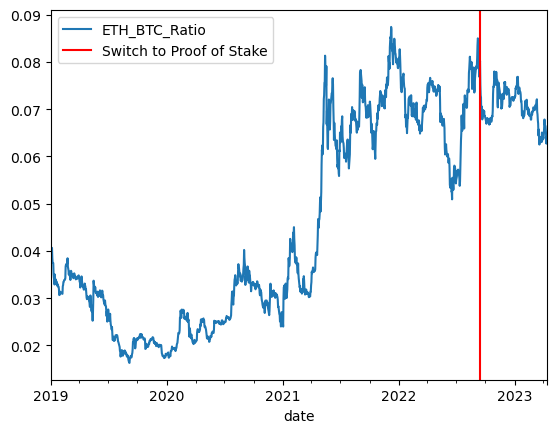

In [22]:
START_DATE='2019-01-01'
END_DATE='2023-04-12'
ax=crypto_frame.loc[START_DATE:END_DATE,'ETH_BTC_Ratio'].plot()
#ax.axvline(y='2023-04-12')
ax.axvline(x ='2022-09-15', ymin = 0.0, ymax = 1,color ='red',label='Switch to Proof of Stake')
ax.legend()

We can see a small drop in the ratio of ETH to BTC around the switch over from proof-of-work to proof-of-stake, although it did bounceback within a month. There is a slight overall downward tren after the switch.

# Correlations

Pandas provide simple tools for calculating correlation between variables in a dataframe.

Definition of correlation of two variables:
corr($X,Y$) = $\frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}} =
\frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_{X}\sigma_{Y}}$

$-1 \leq \text{corr}(X,Y) \leq 1$



In [23]:
# Define correlation frame
value_name='Adj Close'
# could also correlate on 'DailyLogReturn' or '30DayVol'

corr_frame = pd.concat([data_set[value_name].rename(f"{name}_value") for name,data_set in zip(names,data_sets)],axis=1)
corr_frame.dropna(inplace=True)
corr_frame.head()

,MSI_value,Intel_value,ASUS_value,NVIDIA_value,AMD_value
Date,,,,,
2000-01-05,116.658432,24.335432,93.584663,0.842325,15.00
2000-01-06,103.406738,22.916786,93.307838,0.787365,16.00
2000-01-07,111.933426,23.862555,91.369652,0.800508,16.25
2000-01-10,121.437775,24.953831,96.076584,0.826793,17.50
2000-01-11,115.354973,26.099659,94.692215,0.793338,17.25


In [24]:
value_name='DailyLogReturn'
# could also correlate on 'Adj Close' or '30DayVol'

corr_dailyreturn_frame = pd.concat([data_set[value_name].rename(f"{name}_value") for name,data_set in zip(names,data_sets)],axis=1)
corr_dailyreturn_frame.dropna(inplace=True)
corr_dailyreturn_frame.head()

,MSI_value,Intel_value,ASUS_value,NVIDIA_value,AMD_value
Date,,,,,
2000-01-06,-0.120580,-0.060064,-0.002962,-0.067474,0.064539
2000-01-07,0.079234,0.040441,-0.020991,0.016555,0.015504
2000-01-10,0.081498,0.044717,0.050232,0.032308,0.074108
2000-01-11,-0.051388,0.044895,-0.014514,-0.041305,-0.014389
2000-01-12,0.007972,0.017272,0.065087,-0.025935,0.049480


In [25]:
# Adding in some computation of 30 day rolling variables

corr_time_scale = 30
min_time = max(5,int(corr_time_scale/3))
dataframe = corr_dailyreturn_frame
for data_name in names:
    #data_name = 'AMD'
    value_name=f'{data_name}_value'

    dataframe[f'{data_name}_mu']=dataframe[value_name].rolling(window=corr_time_scale,center=False,min_periods=min_time).mean()
    dataframe[f'{data_name}_sigma']=dataframe[value_name].rolling(window=corr_time_scale,center=False,min_periods=min_time).std()


In [26]:
corr_names=names
# will prefer to avoid double counting the covariance or correlation calculation
# i.e.   not doing Intel_vs_AMD and AMD_vs_Intel
# But when time shifts are introduced, the two permutations will be different
# Intel_vs_AMD1Day and AMD_vs_Intel1Day
name_pairs=[]
for i in range(len(corr_names)):
    for j in range(i+1,len(corr_names)):
        var1=corr_names[i]
        var2=corr_names[j]
        #print(f"{i} {j}: {var1} {var2}")
        name_pairs.append((var1,var2))
    #data_name in names
print(name_pairs)

[('MSI', 'Intel'), ('MSI', 'ASUS'), ('MSI', 'NVIDIA'), ('MSI', 'AMD'), ('Intel', 'ASUS'), ('Intel', 'NVIDIA'), ('Intel', 'AMD'), ('ASUS', 'NVIDIA'), ('ASUS', 'AMD'), ('NVIDIA', 'AMD')]


In [27]:
#daily_corr_names=[]
corr_names=[]
# correlation via pandas's built in rolling method
#pandas_corr_names=[]
for (var1,var2) in name_pairs:
    #daily_corr_name=f'DailyCorr_{var1}_{var2}'
    corr_name=f'Corr_{var1}_{var2}'
    #pandas_corr_name=f'PCorr_{var1}_{var2}'
    print(f"Calculating correlation for {corr_name}")
    #daily_corr_names.append(daily_corr_name)
    corr_names.append(corr_name)
    #pandas_corr_names.append(pandas_corr_name)
    #corr_frame[daily_corr_name] = corr_frame.apply(CalculateDailyCorrelation,args=(var1,var2),axis=1)
    #corr_frame[corr_name] = corr_frame[daily_corr_name].rolling(window=corr_time_scale,center=False,min_periods=min_time).mean()
    corr_frame[corr_name] = corr_frame[f'{var1}_value'].rolling(window=corr_time_scale,center=False,min_periods=min_time).corr(corr_frame[f'{var2}_value'])
    


Calculating correlation for Corr_MSI_Intel
Calculating correlation for Corr_MSI_ASUS
Calculating correlation for Corr_MSI_NVIDIA
Calculating correlation for Corr_MSI_AMD
Calculating correlation for Corr_Intel_ASUS
Calculating correlation for Corr_Intel_NVIDIA
Calculating correlation for Corr_Intel_AMD
Calculating correlation for Corr_ASUS_NVIDIA
Calculating correlation for Corr_ASUS_AMD
Calculating correlation for Corr_NVIDIA_AMD


In [28]:
corr_dailyreturn_names=[]
for (var1,var2) in name_pairs:
    corr_name=f'Corr_{var1}_{var2}'
    print(f"Calculating correlation for {corr_name}")
    corr_dailyreturn_names.append(corr_name)
    corr_dailyreturn_frame[corr_name] = corr_dailyreturn_frame[f'{var1}_value'].rolling(window=corr_time_scale,center=False,min_periods=min_time).corr(corr_dailyreturn_frame[f'{var2}_value'])

    


Calculating correlation for Corr_MSI_Intel
Calculating correlation for Corr_MSI_ASUS
Calculating correlation for Corr_MSI_NVIDIA
Calculating correlation for Corr_MSI_AMD
Calculating correlation for Corr_Intel_ASUS
Calculating correlation for Corr_Intel_NVIDIA
Calculating correlation for Corr_Intel_AMD
Calculating correlation for Corr_ASUS_NVIDIA
Calculating correlation for Corr_ASUS_AMD
Calculating correlation for Corr_NVIDIA_AMD


In [29]:
for column in corr_frame.columns:
    print(column)

MSI_value
Intel_value
ASUS_value
NVIDIA_value
AMD_value
Corr_MSI_Intel
Corr_MSI_ASUS
Corr_MSI_NVIDIA
Corr_MSI_AMD
Corr_Intel_ASUS
Corr_Intel_NVIDIA
Corr_Intel_AMD
Corr_ASUS_NVIDIA
Corr_ASUS_AMD
Corr_NVIDIA_AMD


<AxesSubplot:xlabel='Date'>

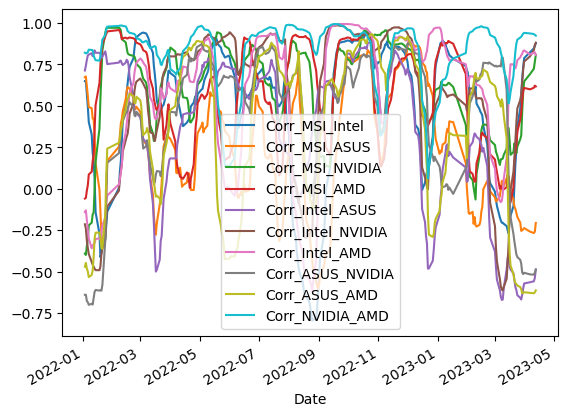

In [30]:
START_DATE='2022-01-01'
END_DATE='2023-04-12'
corr_frame.loc[START_DATE:END_DATE,corr_names].plot()

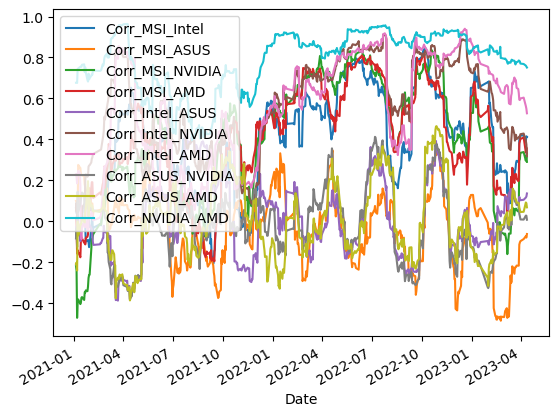

In [31]:
START_DATE='2021-01-01'
END_DATE='2023-04-12'
ax=corr_dailyreturn_frame.loc[START_DATE:END_DATE,corr_dailyreturn_names].plot()
ax.legend(loc='upper left')

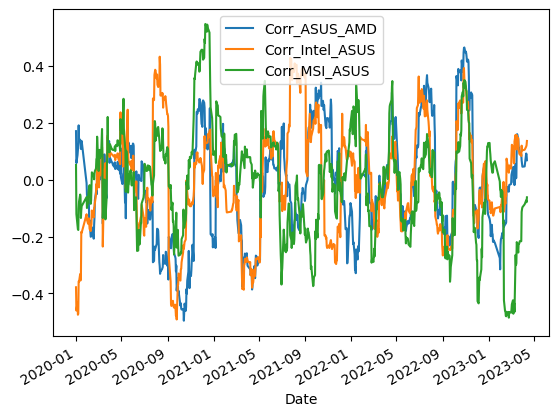

In [32]:
START_DATE='2020-01-01'
END_DATE='2023-04-12'
list1=['Corr_ASUS_AMD', 'Corr_Intel_ASUS', 'Corr_MSI_ASUS']
corr_dailyreturn_frame.loc[START_DATE:END_DATE,list1].plot()
plt.legend()

A priori, one of the more interesting correlations to look at would be that between returns for NVIDIA and AMD, which are the primary producers of GPUs. Asus and MSI sell graphics cards with GPUs from NVIDIA and AMD, while Intel's GPUs are primarily integrated GPUs.

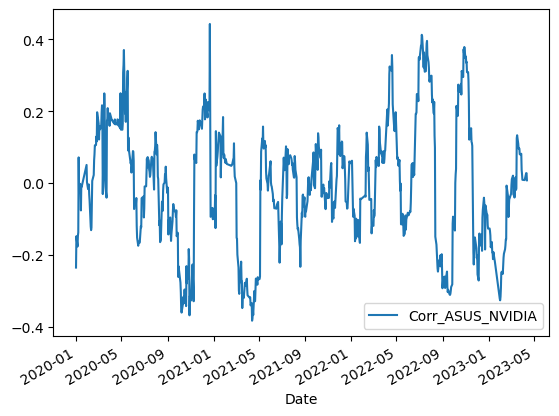

In [33]:
START_DATE='2020-01-01'
END_DATE='2023-04-12'
list1=['Corr_ASUS_NVIDIA']
corr_dailyreturn_frame.loc[START_DATE:END_DATE,list1].plot()
plt.legend()

The swings between correlation and anticorrelation are fascinating, especially in the regions where there seems to be some periodicity.

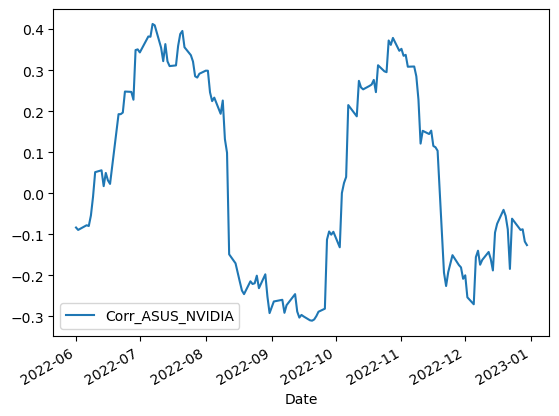

In [34]:
START_DATE='2022-06-01'
END_DATE='2023-01-01'
list1=['Corr_ASUS_NVIDIA']
corr_dailyreturn_frame.loc[START_DATE:END_DATE,list1].plot()
plt.legend()

It looks like a period of around 3 months (can check FFT next). Possibly related to quarterly reports or actions?

(-0.02019661212927623, 0.02019661212927623)

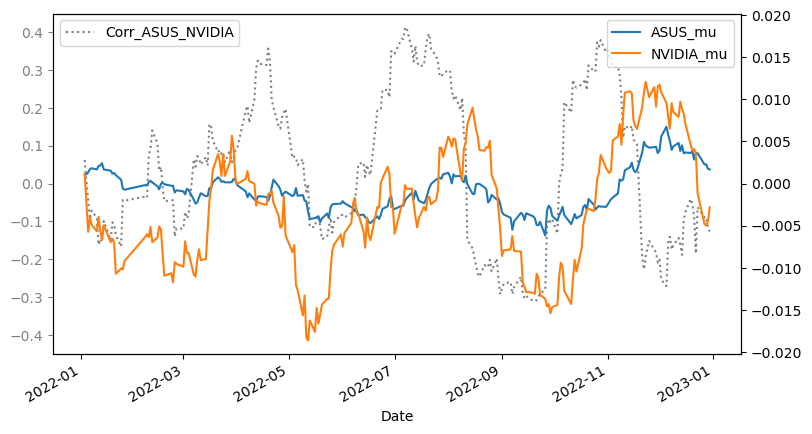

In [35]:
START_DATE='2022-01-01'
END_DATE='2023-01-01'

# plot together
fig, ax = plt.subplots(figsize=(11,5))
axes = [ax,ax.twinx()]
fig.subplots_adjust(right=0.75)

color1='gray'
list1=['Corr_ASUS_NVIDIA']
corr_dailyreturn_frame.loc[START_DATE:END_DATE,list1].plot(ax=axes[0],color=color1,linestyle='dotted')

dataframe.loc[START_DATE:END_DATE,['ASUS_mu','NVIDIA_mu']].plot(ax=axes[1])
axes[0].tick_params(axis='y',colors=color1)

# Make sure the axes are centered
ymin1,ymax1=axes[0].get_ylim()
axes[0].set_ylim([min(ymin1,-ymax1),max(ymax1,-ymin1)])

ymin2,ymax2=axes[1].get_ylim()
axes[1].set_ylim([min(ymin2,-ymax2),max(ymax2,-ymin2)])

#color2=('gray')
#vols.loc[START_DATE:END_DATE].plot(ax=ax)
#data_VIX.loc[START_DATE:END_DATE,'CLOSE'].plot(ax=axes[1],color=color2,linestyle='dotted')
#axes[1].set_ylabel("VIX",color=color2)
#axes[1].tick_params(axis='y',colors=color2)